In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score, precision_recall_curve, auc, average_precision_score, precision_recall_fscore_support
import xgboost as xgb
from sklearn.pipeline import Pipeline

import os
import pickle
import sys

os.getcwd()

ROOT = "C:/Users/mabid/OneDrive/Desktop/Projects - Ongoing/BNP Credit Card Fraud Detection/fraud_detection/"
sys.path.append(ROOT)

from src.visualization.evaluation_report import Model, GenerateReport
from src.features.build_features import ColumnManipulatorDrop, CleanItems, preprocess, ProcessingPipeline

In [2]:
MODEL_RANK = -1
EVAL_DATA = os.path.join(ROOT, 'data/processed/model_validation_data.csv')

# Show models that are in the models directory that has "16" in its name
active_models = [model for model in os.listdir(os.path.join("models")) if '16' in model]
print(active_models)
MODEL_PATH = active_models[MODEL_RANK]

# Load the model
with open(os.path.join(ROOT, "models", MODEL_PATH), 'rb') as file:
    model_args = pickle.load(file)

['01-Anas-XGBTuned-16_Feb_2024_06_48_04.pickle', '01-Anas-XGBTuned-16_Feb_2024_06_52_44.pickle', '01-Anas-XGBTuned-16_Feb_2024_07_10_22.pickle', '01-Anas-XGBTuned-16_Feb_2024_07_12_25.pickle', '01-Anas-XGBTuned-16_Feb_2024_07_14_13.pickle']


C:\Users/mabid/OneDrive/Desktop/Projects - Ongoing/BNP Credit Card Fraud Detection/fraud_detection\src\visualization\evaluation_report.py:81: DtypeWarning: Columns (104,105,106,107,108,109,110,111,112,113,114,115,117,118,119,120) have mixed types. Specify dtype option on import or set low_memory=False.
  eval_data = pd.read_csv(EVAL_DATA)


array([[<Axes: title={'center': 'XGBoost Model\nThreshold: 0.01\nTrue Labels'}, ylabel='Predicted Labels'>,
        <Axes: title={'center': 'XGBoost Model\nThreshold: 0.1\nTrue Labels'}, ylabel='Predicted Labels'>,
        <Axes: title={'center': 'Average Precision Score (XGBoost): 0.3027'}, xlabel='Recall', ylabel='Precision'>],
       [<Axes: title={'center': 'XGBoost Model\nThreshold: 0.01\nTrue Labels'}, ylabel='Predicted Labels'>,
        <Axes: title={'center': 'XGBoost Model\nThreshold: 0.1\nTrue Labels'}, ylabel='Predicted Labels'>,
        <Axes: title={'center': 'Average Precision Score (XGBoost): 0.1804'}, xlabel='Recall', ylabel='Precision'>],
       [<Axes: title={'center': 'XGBoost Model\nThreshold: 0.01\nTrue Labels'}, ylabel='Predicted Labels'>,
        <Axes: title={'center': 'XGBoost Model\nThreshold: 0.1\nTrue Labels'}, ylabel='Predicted Labels'>,
        <Axes: title={'center': 'Average Precision Score (XGBoost): 0.1803'}, xlabel='Recall', ylabel='Precision'>]],
   

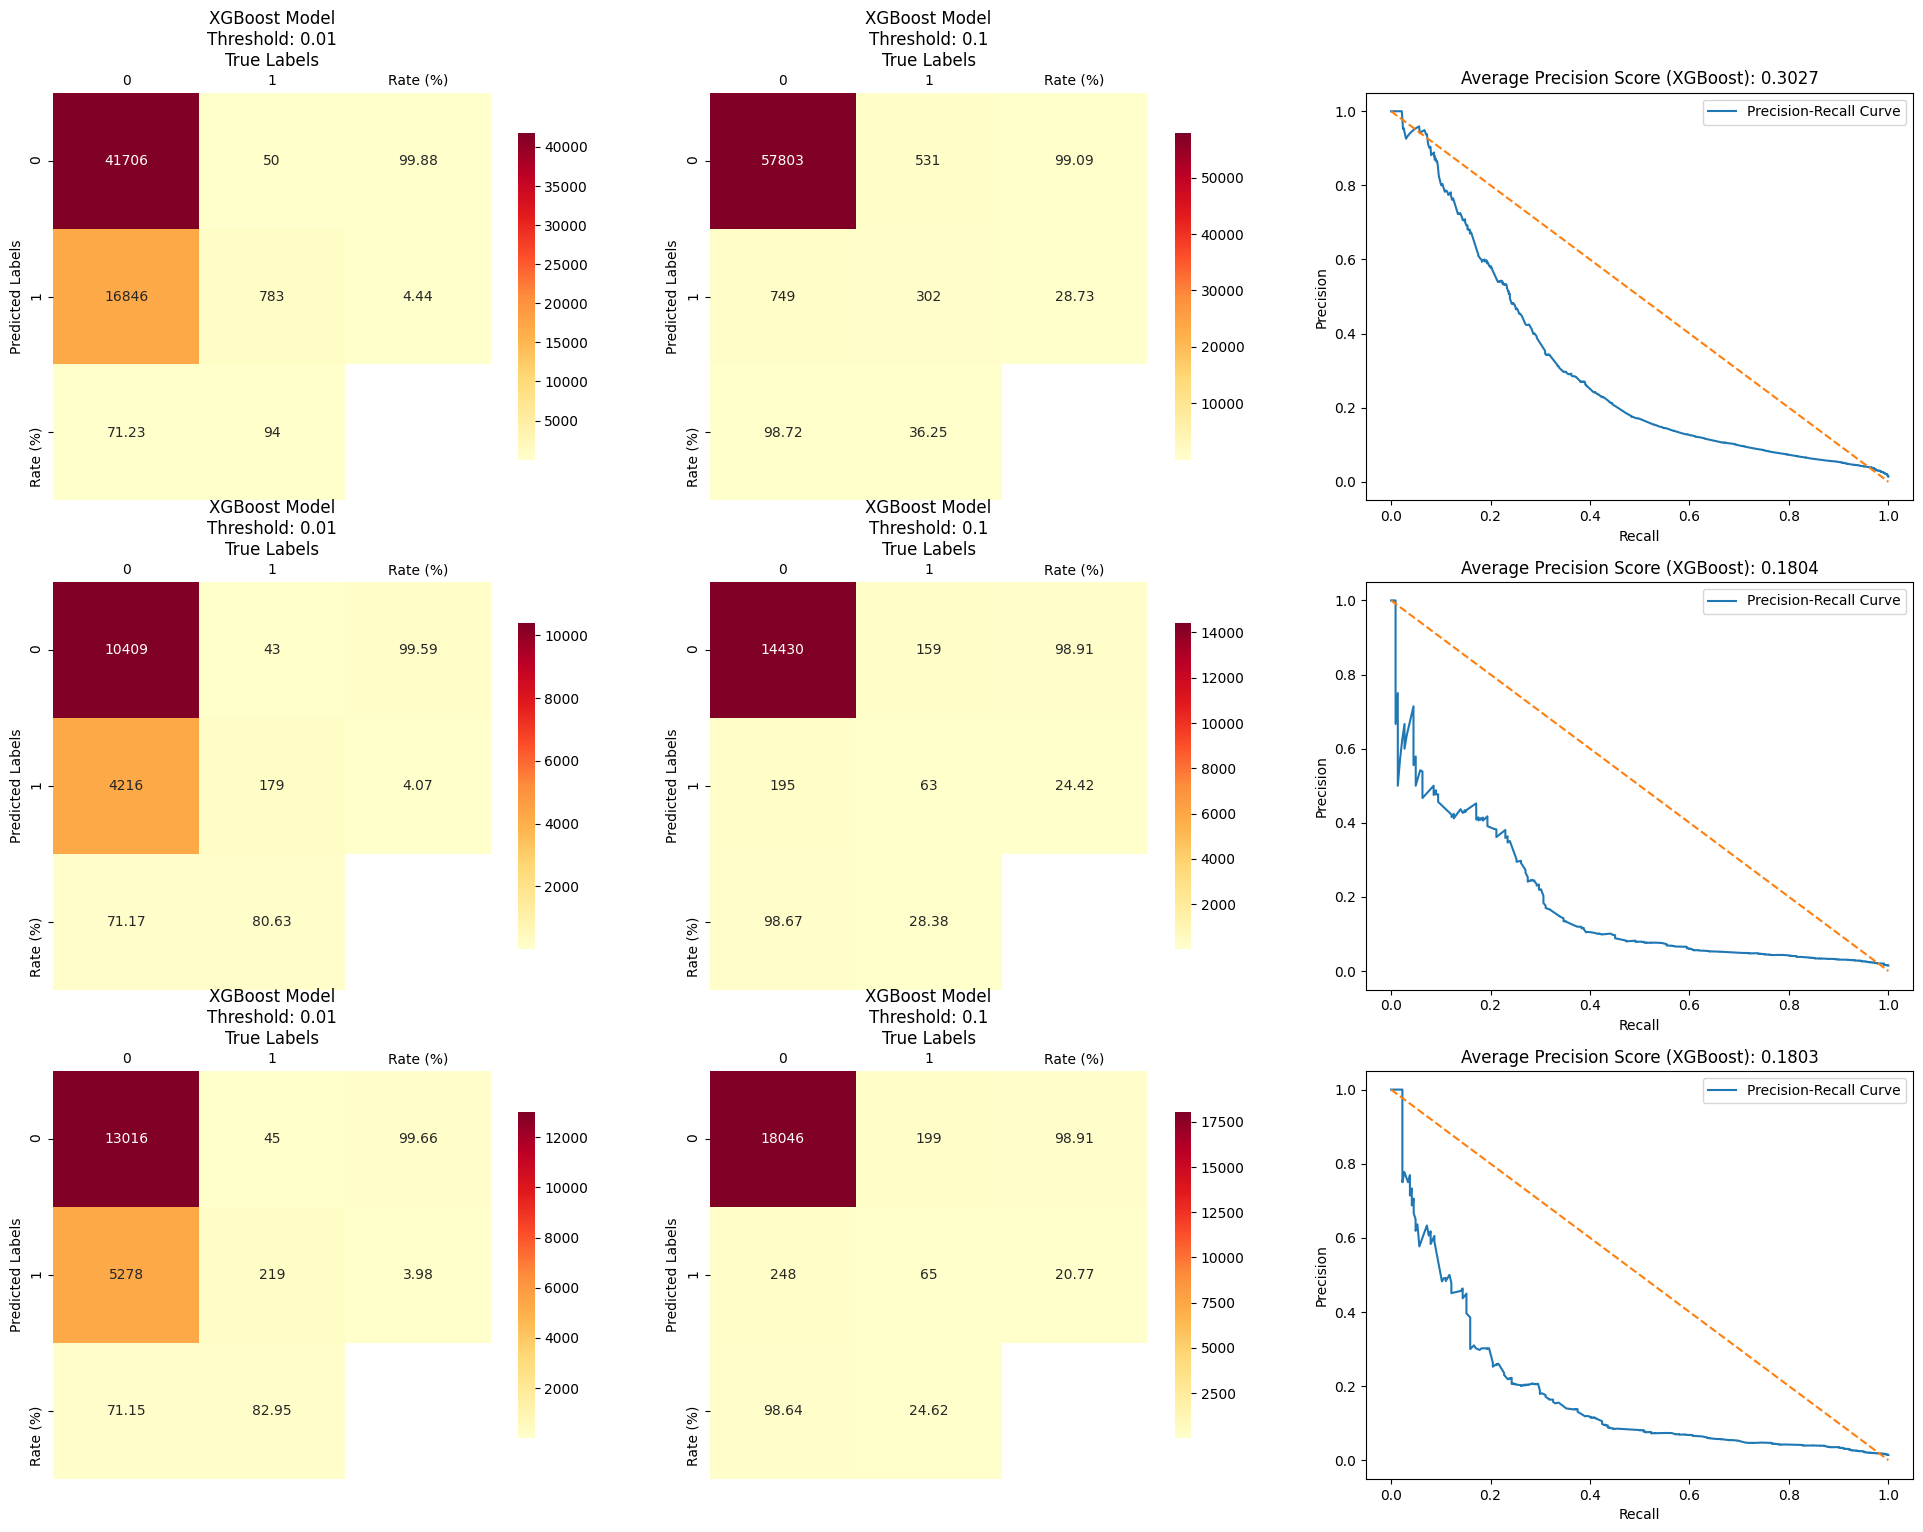

In [3]:
sbh = Model(model_args)
sbh.load_predict_eval(EVAL_DATA)

report = GenerateReport(sbh)
report.generate_report()

from pathlib import Path

VAL_DATA = Path(ROOT, 'data', 'raw', 'X_test.csv')
ref = sbh.generate_submission(VAL_DATA, True)

In [4]:
# Read the docstring of the Model class
print(Model.__doc__)


    Class to instantiate a model object :
    Args:
    model_args: dict
        A dictionary containing the following keys:
        - model: The model object
        - pipe: The pipeline object
        - model_name: The name of the model : "string"
        - prediction_matrix_type: The type of prediction matrix used by the model : "string
        - y_true_train: The true labels for the training data : ndarray
        - y_pred_train: The predicted labels for the training data : ndarray
        - y_true_test: The true labels for the testing data : ndarray
        - y_pred_test: The predicted labels for the testing data : ndarray
        
        output = {"model": model,
          "model_params_explicit": params if PARAMS_FILE else None,
          "pipe": pipe,
          "model_name": "XGBoost",
          "prediction_matrix_type": "xgb.DMatrix",
          "y_true_train": y_true_train,
          "y_pred_train": y_pred_train,
          "y_true_test": y_true_test,
          "y_pred_test":

In [5]:
from pathlib import Path

submission_df = pd.read_csv(Path(ROOT, 'data', 'raw', 'X_test.csv'))
submission_df

C:\Users\mabid\AppData\Local\Temp\ipykernel_23592\631882779.py:3: DtypeWarning: Columns (20,21,22,23,24,68,69,70,71,72,92,93,94,95,96,97,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  submission_df = pd.read_csv(Path(ROOT, 'data', 'raw', 'X_test.csv'))


,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items
0,64707,HEALTH BEAUTY ELECTRICAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,63919,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,15664,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,6626,COMPUTERS,FULFILMENT CHARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,26766,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23193,63474,COMPUTER PERIPHERALS ACCESSORIES,POWER BATTERIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
23194,80438,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
23195,29485,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
23196,59838,COMPUTER PERIPHERALS ACCESSORIES,WARRANTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [6]:
from pathlib import Path

VAL_DATA = Path(ROOT, 'data', 'raw', 'X_test.csv')
ref = sbh.generate_submission(VAL_DATA, True)

C:\Users/mabid/OneDrive/Desktop/Projects - Ongoing/BNP Credit Card Fraud Detection/fraud_detection\src\visualization\evaluation_report.py:93: DtypeWarning: Columns (20,21,22,23,24,68,69,70,71,72,92,93,94,95,96,97,106,107,108,109,110,111,112,113,114,115,116,117,118) have mixed types. Specify dtype option on import or set low_memory=False.
  eval_data = pd.read_csv(SUBMISSION_DATA)


In [7]:
# from pathlib import Path

# submission_df = pd.read_csv(Path(ROOT, 'data', 'raw', 'X_test.csv'))
# submission_df = sbh.pipe.transform(submission_df)

# sbh.model.predict(submission_df)

In [8]:
sbh.submission_df

AttributeError: 'Model' object has no attribute 'submission_df'

In [9]:
sbh.generate_report()

AttributeError: 'Model' object has no attribute 'generate_report'